# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import string

from scipy.stats import linregress

# Import weather key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_city_file = "output_data/cities.csv"

output_weather_file = "output_data/city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, use size>=500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(string.capwords(city))

# Print the city count to confirm sufficient count
len(cities)

1500

In [6]:
#practice creating a dictionary and saving dictionary to csv file
city_dict = {
    "city": cities,
    "lat": lats,
    "long": lngs,
}
city_data = pd.DataFrame(city_dict)


export_csv = city_data.to_csv (output_city_file, index = None, header=True)

city_data.head()


,city,lat,long
0,Kokopo,-5.848210,152.419487
1,Belushya Guba,87.315052,53.625711
2,Maumere,-7.527538,123.275636
3,Barentsburg,79.908661,9.197515
4,Mar Del Plata,-70.320070,-19.326966


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={wkey}&units={units}&q="

# set up lists to hold reponse info
latitude = []
longitude = []
temp = []
maxTemp = []
humidity = []
cloud = []
wind = []
mycity = []
myCount = 0

#cities = ["Paris", "London", "Oslo", "Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if city in mycity:
        pass
    else:        
        try:    

            response = requests.get(query_url + city).json()
            myCount = myCount+1  

            #wait 60 seconds after 50 reads, since only allowed 60 reads per minute        
            if myCount == 50:
                print("fifty cities read, take a break")
                time.sleep(60)
                myCount = 0

            #store city info
            longitude.append(response['coord']['lon'])
            latitude.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            maxTemp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            cloud.append(response['clouds']['all'])
            mycity.append(city)

        #filter out errors, caused by city not foud
        except:
            pass


fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break
fifty cities read, take a break


In [18]:
len(mycity) 

544

In [19]:
len(cloud)

544

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": mycity,
    "lat": latitude,
    "long": longitude,
    "temp": temp,
    "max_temp": maxTemp,
    "humidity": humidity,
    "wind speed": wind,
    "clouds": cloud
}
weather_data = pd.DataFrame(weather_dict)

# print result to file
#export_csv2 = weather_data.to_csv (output_weather_file, index = None, header=True)

#display the data frame
#weather_data.count()

In [21]:
weather_data.head()

,city,lat,long,temp,max_temp,humidity,wind speed,clouds
0,Kokopo,-4.34,152.27,86.08,86.08,62,1.86,64
1,Maumere,-8.63,122.22,81.00,81.00,58,3.36,0
2,Mar Del Plata,-46.43,-67.52,59.17,59.17,24,18.01,22
3,Rikitea,-23.12,-134.97,72.11,72.11,63,4.59,0
4,Bilibino,68.06,166.44,22.74,22.74,82,4.16,18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

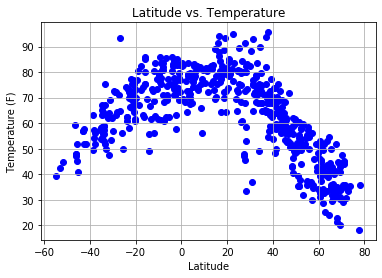

In [22]:
#scatter plot
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature")

plt.scatter(weather_data["lat"],weather_data["temp"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_1_Latitude_vs_Temperature.pdf', dpi=300)  
plt.show()

#### Latitude vs. Humidity Plot

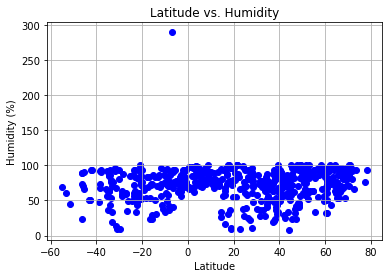

In [23]:
#scatter plot
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")

plt.scatter(weather_data["lat"],weather_data["humidity"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_2_Latitude_vs_Humidity.pdf', dpi=300)  
plt.show()

#### Latitude vs. Cloudiness Plot

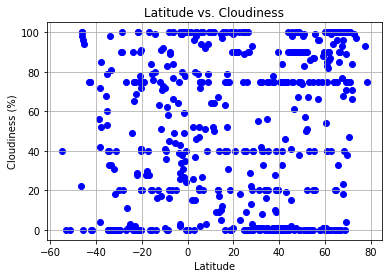

In [24]:
#scatter plot
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")

plt.scatter(weather_data["lat"],weather_data["clouds"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_3_Latitude_vs_Cloudiness.pdf', dpi=300)  
plt.show()

#### Latitude vs. Wind Speed Plot

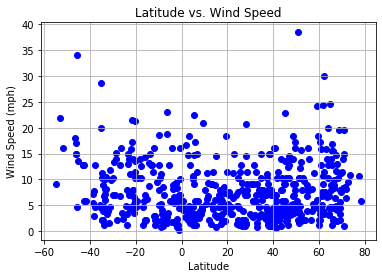

In [25]:
#scatter plot
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed")

plt.scatter(weather_data["lat"],weather_data["wind speed"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_4_Latitude_vs_WindSpeed.pdf', dpi=300)  
plt.show()



## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [26]:
# Create Northern and Southern Hemisphere DataFrames
northHemisphere_dict = {
    "city": weather_data.loc[weather_data["lat"]>0]["city"],
    "lat": weather_data.loc[weather_data["lat"]>0]["lat"],
    "max_temp": weather_data.loc[weather_data["lat"]>0]["max_temp"],
    "humidity": weather_data.loc[weather_data["lat"]>0]["humidity"],
    "wind speed": weather_data.loc[weather_data["lat"]>0]["wind speed"],
    "clouds": weather_data.loc[weather_data["lat"]>0]["clouds"]
}
northHemisphere_data = pd.DataFrame(northHemisphere_dict)

In [27]:
southHemisphere_dict = {
    "city": weather_data.loc[weather_data["lat"]<0]["city"],
    "lat": weather_data.loc[weather_data["lat"]<0]["lat"],
    "max_temp": weather_data.loc[weather_data["lat"]<0]["max_temp"],
    "humidity": weather_data.loc[weather_data["lat"]<0]["humidity"],
    "wind speed": weather_data.loc[weather_data["lat"]<0]["wind speed"],
    "clouds": weather_data.loc[weather_data["lat"]<0]["clouds"]
}
southHemisphere_data = pd.DataFrame(southHemisphere_dict)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

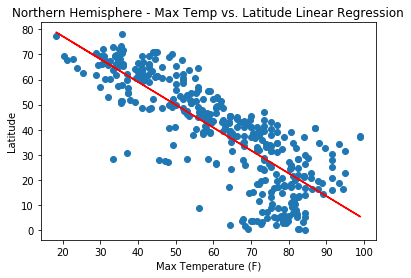

In [28]:
x_values = northHemisphere_data["max_temp"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

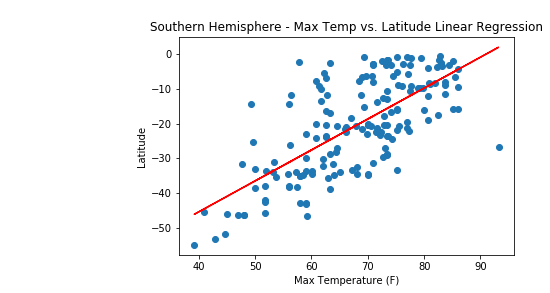

In [29]:
x_values = southHemisphere_data["max_temp"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

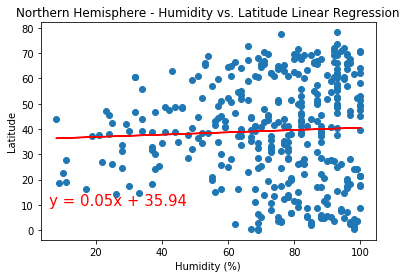

In [30]:
x_values = northHemisphere_data["humidity"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

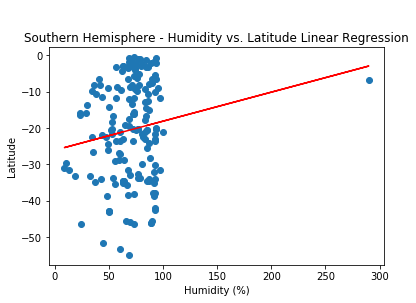

In [31]:
x_values = southHemisphere_data["humidity"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

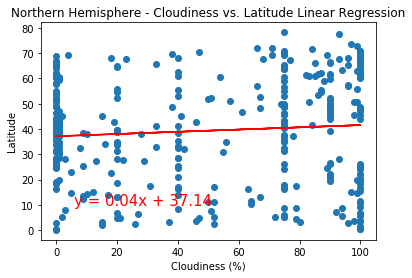

In [32]:
x_values = northHemisphere_data["clouds"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

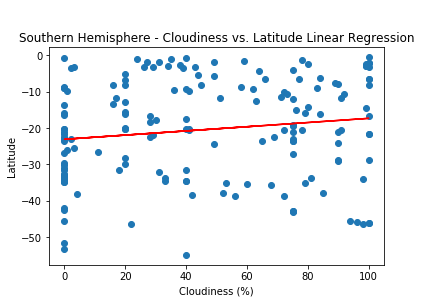

In [33]:
x_values = southHemisphere_data["clouds"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

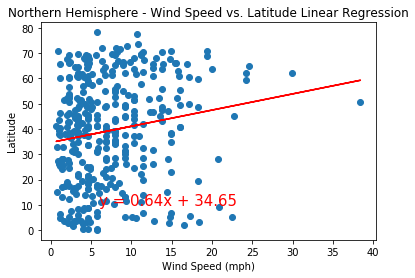

In [34]:
x_values = northHemisphere_data["wind speed"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

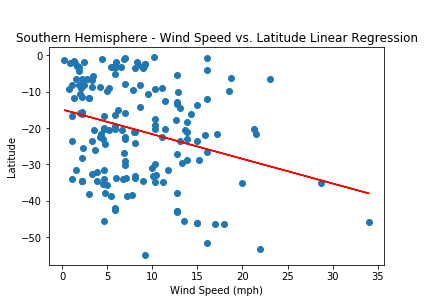

In [35]:
x_values = southHemisphere_data["wind speed"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()